In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

## Preliminary K alpha lines analysis

In [2]:
K_alpha = pd.read_csv("K-alpha analysis.csv")
K_alpha

,Ato,Kline,Uncertainty,Energy(keV),FWHM
0,17,319.91,5.53,2.62239,19.2335
1,22,540.14,0.36,4.51080,24.2249
2,24,646.27,0.47,5.41470,25.4010
3,26,761.83,0.54,6.40380,25.8590
4,28,888.28,0.42,7.47810,26.6226
5,29,954.62,0.36,8.04770,27.9838
6,30,1024.15,0.27,8.63880,28.2923
7,47,2602.78,0.75,22.16290,38.6308
8,48,2720.37,0.57,23.17360,41.4460
9,50,2963.52,0.61,25.27130,45.7194


In [3]:
def slp_yitcp_error(x,y,errx,erry):
    slp_max = (y[len(y)-1]+erry[len(erry)-1]-y[0]+erry[0]) / (x[len(x)-1]-errx[len(errx)-1]-x[0]-errx[0])
    slp_min = (y[len(y)-1]-erry[len(erry)-1]-y[0]-erry[0]) / (x[len(x)-1]+errx[len(errx)-1]-x[0]+errx[0])
    yitcp_max = y[0]-slp_min*x[0]
    yitcp_min = y[0]-slp_max*x[0]
    slp_err = (slp_max-slp_min)/2
    yitcp_err = (yitcp_max-yitcp_min)/2
    return[slp_err, yitcp_err]

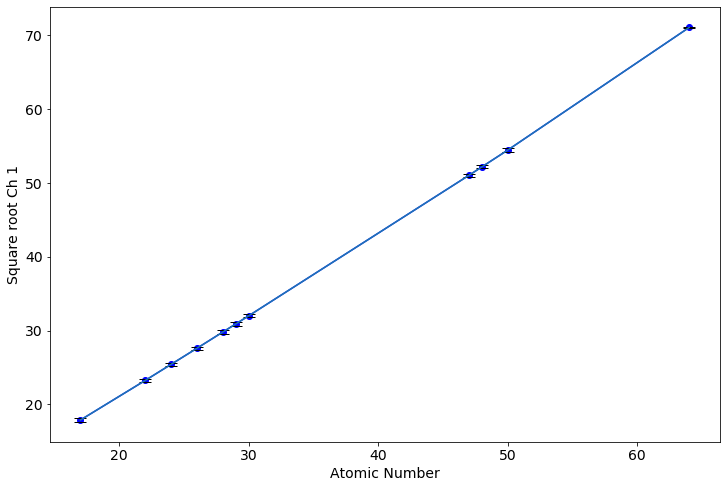

array([ 1.12660132, -1.65880752])

In [4]:
#First calculate the error propagation in this square root process
yerr = 0.5 * (0.5 * K_alpha.FWHM / K_alpha.Kline) * np.sqrt(K_alpha.Kline)
#yerr = K_alpha.Uncertainty
mpl.rcParams['figure.figsize'] = 12.0,8.0  
mpl.rcParams['font.size'] = 14.0 

plt.yscale('linear')  
plt.xscale('linear')

plt.xlabel(r'Atomic Number')
plt.ylabel(r'Square root Ch 1')

plt.plot(K_alpha.Ato,np.sqrt(K_alpha.Kline),"o-b")
plt.errorbar(K_alpha.Ato, np.sqrt(K_alpha.Kline), yerr = yerr, capsize = 6, ecolor = 'black')
plt.show()
#line fit the atomic number and sqrt of Ch, returns coefficient of the polynomial
coef = np.polyfit(K_alpha.Ato, np.sqrt(K_alpha.Kline), deg = 1)
coef

In [14]:
#find the uncertainty of slope and y intercept
slp_yitcp_err = slp_yitcp_error(K_alpha['Ato'], np.sqrt(K_alpha['Kline']),errx=np.zeros(len(K_alpha['Ato'])), erry=yerr)
slp_yitcp_err

[0.008036687642847373, 0.13662368992840612]

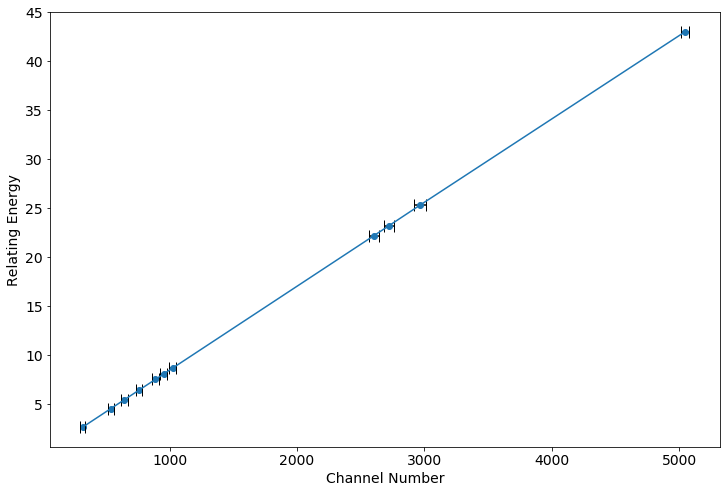

array([ 0.00855077, -0.1078123 ])

In [6]:
xerr = K_alpha.FWHM
mpl.rcParams['figure.figsize'] = 12.0,8.0  
mpl.rcParams['font.size'] = 14.0 

plt.yscale('linear')  
plt.xscale('linear')

plt.xlabel(r'Channel Number')
plt.ylabel(r'Relating Energy')

plt.plot(K_alpha.Kline,K_alpha['Energy(keV)'],"o")
plt.errorbar(K_alpha.Kline, K_alpha['Energy(keV)'], xerr = xerr, capsize = 6, ecolor = 'black')
plt.show()
#line fit Ch and its relating energy, return coefficient of the polynomial
coef2 = np.polyfit(K_alpha.Kline, K_alpha['Energy(keV)'], deg = 1)
coef2

In [7]:
#find the uncertainty of slope and y intercept
energy_calib_err = slp_yitcp_error(K_alpha['Kline'], K_alpha['Energy(keV)'],errx=K_alpha['FWHM'], erry=np.zeros(len(K_alpha['Energy(keV)'])))
energy_calib_err

[9.073426736910545e-05, 0.029026799474050513]